In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# 1
# ერთცვლადიანი რეგრესიის მოდელი

In [138]:
gpa= pd.read_csv("gpa.csv")

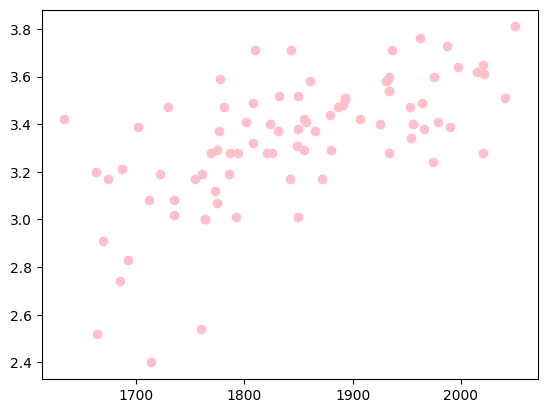

In [139]:
# წამოვიღოთ სვეტები ბაზიდან
X = gpa.iloc[:, :-1].values
y = gpa.iloc[:, 1].values
plt.scatter(X, y, color = "pink")

In [140]:
# დავატრენინგოთ მოდელი და სატესტოდ ავიღოთ მთლიანი მონაცემების 20%
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [141]:
# წრფივი რეგრესიის მოდელი
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [142]:
# რეგრესიის მოდელი (reg) X_test მონაცემთა ნაკრების სამიზნე მნიშვნელობების პროგნოზირებისთვის
y_pred = reg.predict(X_test)
y_pred

array([3.19143271, 3.35562407, 3.07684082, 3.24787349, 3.01013808,
       3.37956865, 3.17603977, 3.12472997, 3.22221859, 3.23077023,
       3.46850564, 3.09394409, 3.32996917, 3.62072471, 3.16748814,
       3.2803697 , 3.61217308])

In [143]:
# (y=mx+c) გამოთვლის m კოეფიციენტს დატრენინგებული მოდელისთვის
print(reg.coef_)
m = reg.coef_[0]
m

[0.00171033]


0.001710326699373339

In [144]:
# (y=mx+c) გამოთვლის c_ს მნიშვნელობას დატრენინგებული მოდელისთვის
print(reg.intercept_)
c = reg.intercept_

0.16586478019104378


In [145]:
# თვლის r^2-ს და პასუხი გვოჩვენებს, რამდენად ემთხვევა რეგრესიული მოდელის პროგნოზები რეალურ სამიზნე მნიშვნელობებს
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3132269460806135

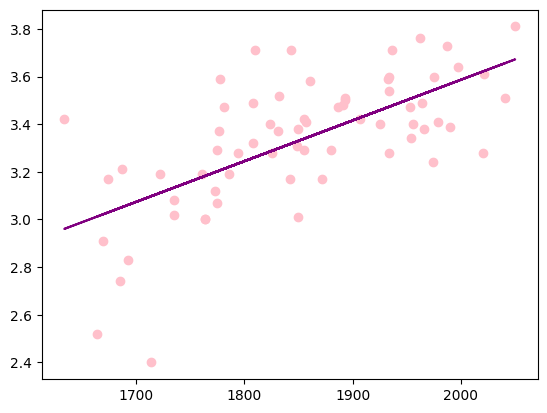

In [146]:
plt.scatter(X_train, y_train, color = 'pink')
plt.plot(X_train, reg.predict(X_train), color = 'purple')

In [ ]:
# 2 
# მრავალ ცვლადიანი რეგრესიის მოდელი

In [147]:
student_perf = pd.read_csv("Student_Performance.csv")

In [148]:
student_perf

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [151]:
# რადგან სვეტი 'Extracurricular Activities' სტრინგის ტიპისაა მათ მნიშვნელობებს გადავაქცევთ რიცხვით მნიშვნელობებად ('Yes', 'No' -> '1', '0')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
student_perf['Extracurricular Activities'] = labelencoder.fit_transform(student_perf['Extracurricular Activities'])

In [152]:
# ვიღებთ სასურველ სვეტებს
X = student_perf.iloc[:, :-1].values.astype(int)
y = student_perf.iloc[:, 5].values.astype(int)

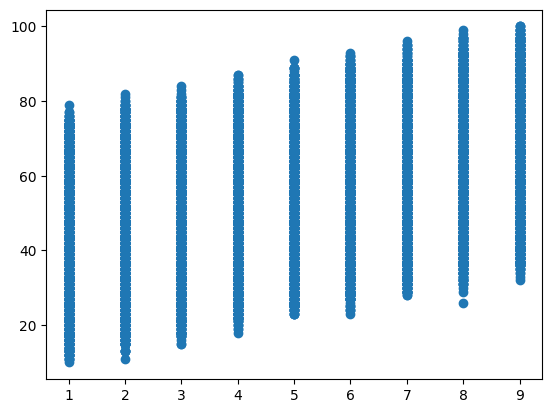

In [153]:
plt.scatter(X[:,0], y)

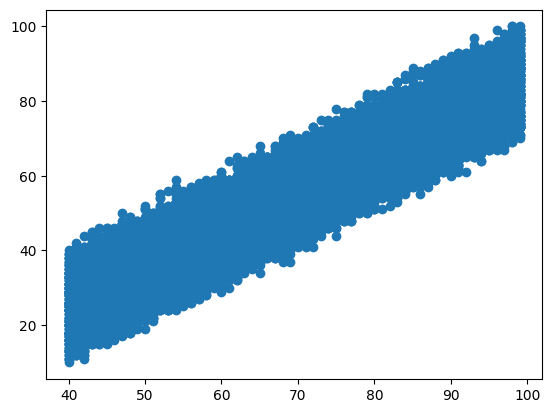

In [154]:
plt.scatter(X[:,1], y)

<Axes: >

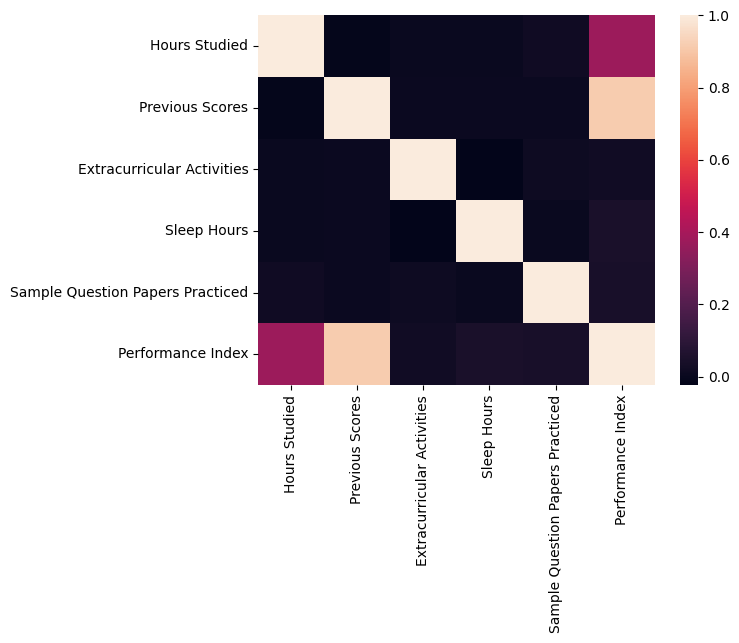

In [155]:
sns.heatmap(student_perf.corr())

In [156]:
# ვატრენინგებთ მოდელს
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42)

In [157]:
# რეგრესიის მოდელი
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [158]:
# რეგრესიის მოდელი X_test მონაცემთა ნაკრების სამიზნე მნიშვნელობების პროგნოზირებისთვის
y_pred = regressor.predict(X_test)
y_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

In [159]:
# კოეფიციენტის გამოთვლა
print(regressor.coef_)

[2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]


In [160]:
# გადაკვეთის წერტილი
print(regressor.intercept_)

-33.921946215556126


In [161]:
# დეტერმინანტის კოეფიციენტი
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9889832909573145

In [ ]:
# 3
# გადაწყვეტილების ხის რეგრესიის მოდელი ერთ ცვლადზე

In [162]:
student_perf2 = pd.read_csv('Student_Performance.csv')

In [163]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
student_perf2['Extracurricular Activities'] = labelencoder.fit_transform(student_perf2['Extracurricular Activities'])

In [164]:
X = student_perf2.iloc[:, 2:3].astype(int)
print(X)

      Extracurricular Activities
0                              1
1                              0
2                              1
3                              1
4                              0
...                          ...
9995                           1
9996                           1
9997                           1
9998                           1
9999                           0

[10000 rows x 1 columns]


In [165]:
y= student_perf2.iloc[:, 5:].astype(int)
print(y)

      Performance Index
0                    91
1                    65
2                    45
3                    36
4                    66
...                 ...
9995                 23
9996                 58
9997                 74
9998                 95
9999                 64

[10000 rows x 1 columns]


In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42)

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [169]:
# ავაგოთ გადაწყვეტილების ხის რეგრესორი და მოვარგოთ X, y მონაცემებს
regressor = DecisionTreeRegressor(max_depth=5, random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [170]:
# დაბეჭდავს პროგნოზირებულ მნიშვნელობას X_pred-ის მნიშვნელობების მიხედვით
X_pred = [[5000]]
y_pred = regressor.predict(X_pred)
print(f"Predicted value: {y_pred}")

Predicted value: [55.70088925]


In [171]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [172]:
# პროგნოზი
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test) 

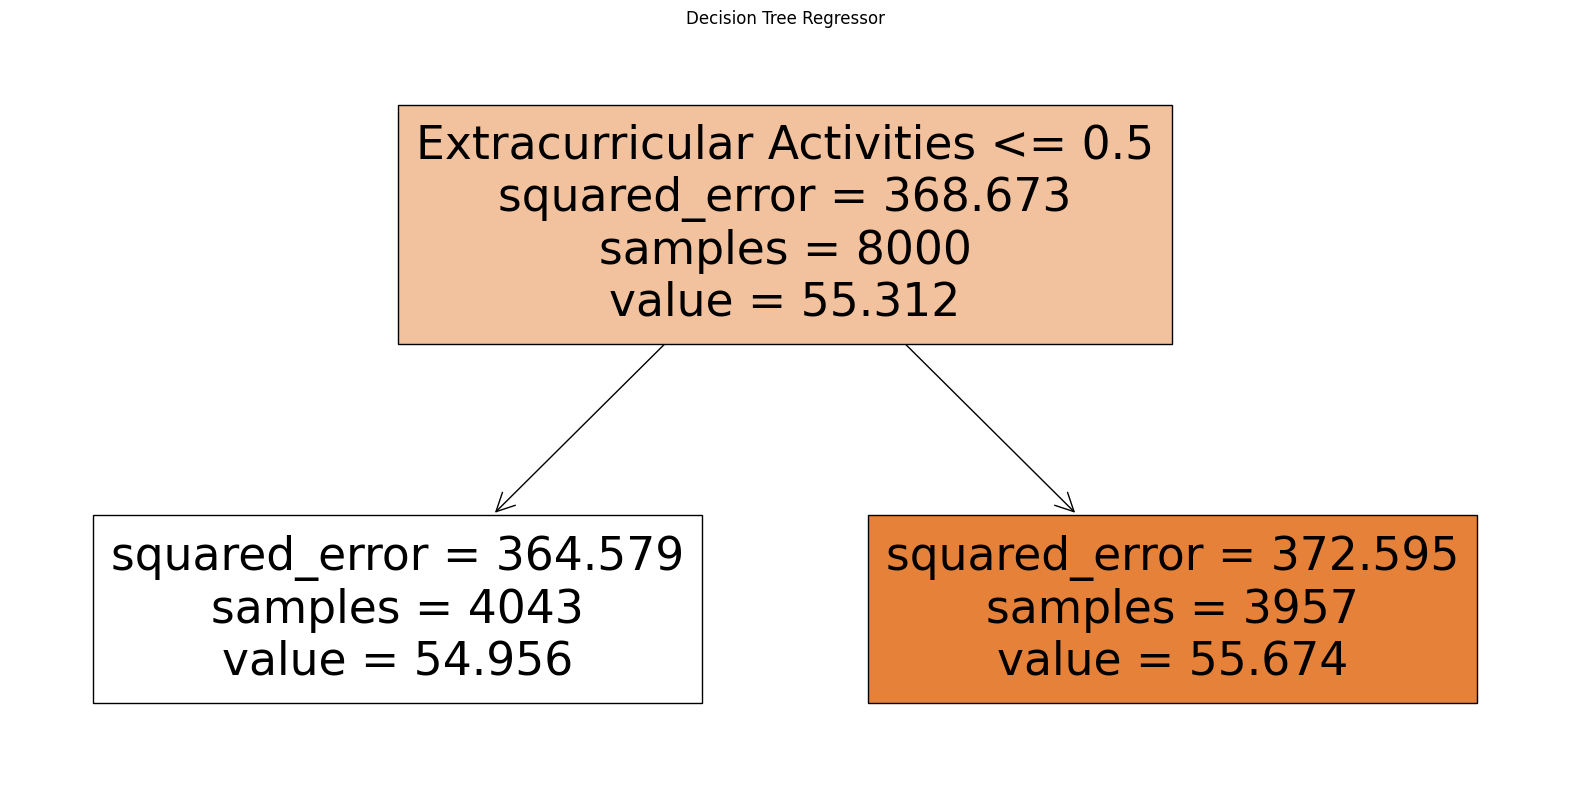

In [174]:
from sklearn.tree import export_graphviz, plot_tree
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

# გადაწყვეტილების ხის ვიზუალიზაცია
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.title("Decision Tree Regressor")
plt.show()
export_graphviz(regressor, out_file='tree.dot', feature_names=X.columns, filled=True)

In [ ]:
# 4
# ლოგისტიკური რეგრესიის მოდელი

In [175]:
cars = pd.read_csv('car_data.csv')

In [176]:
cars

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [177]:
cars = cars.drop(['User ID'],axis=1) 

Text(0, 0.5, 'Purchased')

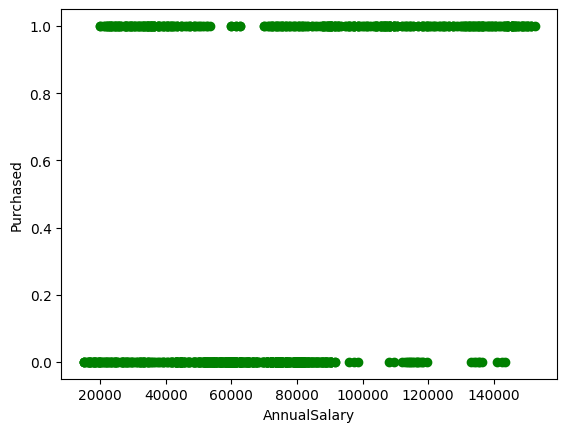

In [178]:
plt.scatter(cars.AnnualSalary, cars.Purchased, color='green')
plt.xlabel('AnnualSalary')
plt.ylabel('Purchased')

In [179]:
X_train, X_test, y_train, y_test = train_test_split(cars[['AnnualSalary']],
                                                    cars.Purchased,
                                                    train_size=0.8, 
                                                    random_state=42)

In [180]:
X_test

,AnnualSalary
521,73500
737,135500
740,59500
660,42500
411,135500
...,...
408,80000
332,19500
208,32000
613,28500


In [181]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [182]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [183]:
model.fit(X_train, y_train)

LogisticRegression()

In [184]:
X_test

,AnnualSalary
521,73500
737,135500
740,59500
660,42500
411,135500
...,...
408,80000
332,19500
208,32000
613,28500


In [185]:
y_predicted = model.predict(X_test)

In [186]:
y_predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [187]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
print("მოდელის პროგნოზის აკურატულობა : ",accuracy*100)

მოდელის პროგნოზის აკურატულობა :  72.5


In [188]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print("მოდელის გაბეულობის მატრიცა : ",cm)

მოდელის გაბეულობის მატრიცა :  [[108   4]
 [ 51  37]]


In [189]:
# თვლის ალბათობის პროგნოზს
model.predict_proba(X_test)

array([[0.61847113, 0.38152887],
       [0.25578184, 0.74421816],
       [0.69705359, 0.30294641],
       [0.77878512, 0.22121488],
       [0.25578184, 0.74421816],
       [0.51443841, 0.48556159],
       [0.79350133, 0.20649867],
       [0.67825102, 0.32174898],
       [0.65320742, 0.34679258],
       [0.5945952 , 0.4054048 ],
       [0.60061111, 0.39938889],
       [0.71775962, 0.28224038],
       [0.56412201, 0.43587799],
       [0.77225262, 0.22774738],
       [0.51443841, 0.48556159],
       [0.85463859, 0.14536141],
       [0.77662263, 0.22337737],
       [0.2327057 , 0.7672943 ],
       [0.34181336, 0.65818664],
       [0.80552853, 0.19447147],
       [0.85618567, 0.14381433],
       [0.33342168, 0.66657832],
       [0.83669778, 0.16330222],
       [0.70491886, 0.29508114],
       [0.21531756, 0.78468244],
       [0.60061111, 0.39938889],
       [0.53004202, 0.46995798],
       [0.81701677, 0.18298323],
       [0.84008728, 0.15991272],
       [0.60061111, 0.39938889],
       [0.

In [190]:
model.score(X_test,y_test)

0.725

In [191]:
# გაბნეულობის მატრიცა
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[108,   4],
       [ 51,  37]], dtype=int64)

In [192]:
y_predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [193]:
# კოეფიციენტი
model.coef_

array([[2.50173114e-05]])

In [194]:
# გადაკვეთის წერტილი 
model.intercept_

array([-2.32183639])

In [ ]:
# სიგმოიდური ფუნქციის მიხედვით გამოვთვალოთ შედეგი ცვლადებზე

In [195]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [196]:
def prediction_function(AnnualSalary):
    z = 2.50 * AnnualSalary - 2.32 
    y = sigmoid(z)
    return y

In [ ]:
# მაგალითი

In [197]:
AnnualSalary = 135500
prediction_function(AnnualSalary)

1.0

In [198]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[108,   4],
       [ 51,  37]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

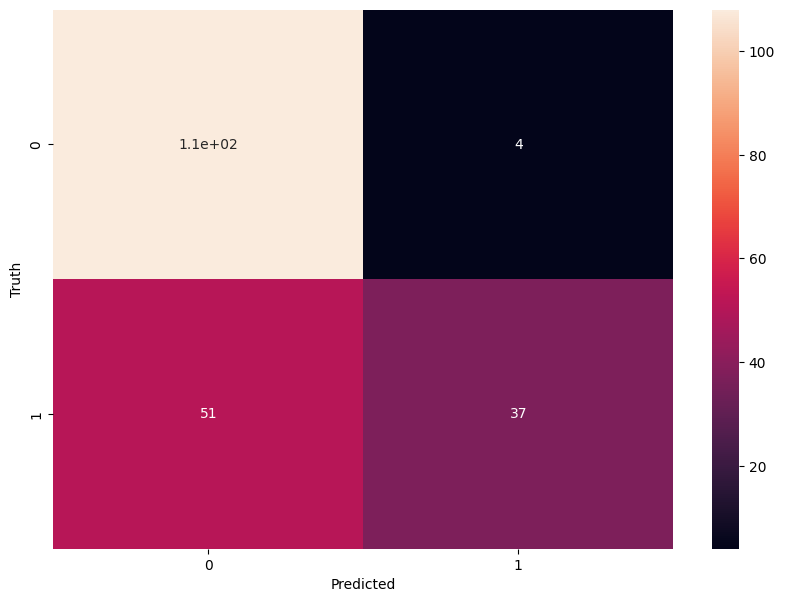

In [199]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# 5
# გადაწყვეტილების ხის კლასიფიკაციის მოდელი

In [200]:
cars2 = pd.read_csv('car_data.csv')

In [201]:
cars2

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [202]:
cars2.drop(['User ID','Purchased'],axis='columns',inplace=True)

In [203]:
inputs = cars2.drop(['Age', 'AnnualSalary',],axis='columns')

In [204]:
inputs=cars2.drop('AnnualSalary', axis='columns')
target =cars2.AnnualSalary

In [205]:
inputs.Gender =inputs.Gender.map({'Male':1, 'Female':2})

In [206]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
    inputs, 
    target, 
    test_size=0.2)

In [208]:
len(X_train)

800

In [209]:
len(X_test)

200

In [210]:
from sklearn import tree

In [211]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [212]:
model.score(X_train,y_train)

0.15

In [213]:
model.predict(X_test)

array([ 72000,  28500,  16500,  29500,  17500,  25500,  29500,  25500,
        61000,  28000,  55500,  76500,  23000,  61500,  15000,  61000,
        76500,  28000,  21500,  24500,  23000,  50000, 104000,  37500,
        21000,  28000,  23000,  25500,  23000,  54500,  43500,  16500,
        75000,  33000,  58500,  16500,  43500,  29000,  62500,  28000,
        20000,  20000,  23000,  80500,  61500,  54500,  56500,  56500,
        62500,  23000,  33000,  18000,  20500,  20000,  15000, 118500,
        43500,  15000,  29000,  41500,  43000,  62500,  33000,  54500,
        72000,  43500,  34500,  19000,  16500,  59000,  33500,  43500,
        80500,  29500,  21000,  23000, 117000,  43500,  58500,  21500,
        23000,  21000,  37500,  28500, 132500,  29500,  20000, 117000,
        23500,  24500,  37500,  29000,  43000,  28500,  58500,  23000,
        28000,  62500,  80500,  72000,  61000,  20500,  27500,  36500,
        24500,  33000, 117000,  27500,  24500,  33000,  43500,  24500,
      

In [214]:
target

0       20000
1       43500
2       74000
3      107500
4       79000
        ...  
995     59000
996     23500
997    138500
998    134000
999     73500
Name: AnnualSalary, Length: 1000, dtype: int64

In [215]:
# test
test_data = pd.DataFrame({
    'Gender': [1],  # Male
    'Age': [30]  
})

# პროგნოზი გასატესტი მონაცემებისთვის
predicted_salary = model.predict(test_data)

In [216]:
print(f"პროგნოზი: {predicted_salary[0]}")

პროგნოზი: 44500
